In [50]:
# Behavioural analysis

## Preparing the data

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob
from matplotlib import cm
import psychopy
from psychopy.tools.filetools import fromFile

Loading the data:

In [134]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mc2_tgT-mcBv'
#condName = 'mc2_tgT-mcBv_peri'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName + '*'))
print dataDir
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
print allSubjDirs
stairs = pd.DataFrame()
# matrices for intensities, responses, and means of reversals:
intns, resps, thisRevs, revMeans = [],[],[],[] 
orderInfo = pd.DataFrame() # subj, session, and stair info for ordering intns & resps

/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv*
['/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p0_s2_2017-01-26_1545', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_peri_p0_s1_2017-01-26_1252']


In [135]:
for subjDir in allSubjDirs:
    print subjDir
    subjStairsPath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    subjStairs = pd.read_csv(subjStairsPath)
    stairs = stairs.append(subjStairs)
    #print subjStairs
    for subjStairLabel in subjStairs['stairLabel']:
        #print subjStairLabel #thisSubjStair['label']
        thisStair = fromFile(subjDir + '/' + subjStairLabel + '.psydat')
        intns.append(thisStair.intensities)
        resps.append(thisStair.data)
        theseRevIntns = thisStair.reversalIntensities #detectRevs(thisStair)
        #print np.round(theseRevIntns,1)
        revMeans.append([np.average(thisStair.reversalIntensities[-4:]),
                         np.average(thisStair.reversalIntensities[-6:]),
                         np.average(thisStair.reversalIntensities[-8:])])
        orderInfo = orderInfo.append(pd.DataFrame({
                    'participant': subjStairs.participant[0],
                    'mcBv': thisStair.extraInfo['mcBv'],
                    'targTpeak': thisStair.extraInfo['targTpeak'],
                    'targXoff2': thisStair.extraInfo['targXoff2'],
                    'targV': thisStair.extraInfo['targV'],
                    'stairStart': [thisStair.extraInfo['startContr']]
                    }))
                    #'sessionLabel': os.path.basename(subjStairsPath)[:-20],
                    #'stairLabel': [subjStairLabel]
        #print np.round(thisStair.intensities,2)
        #print thisStair.data # responses (correct/incorrect)
        #print thisStair.extraInfo

/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p0_s2_2017-01-26_1545
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_peri_p0_s1_2017-01-26_1252


In [136]:
stairs['condLabel'] = 'mcBv-' + stairs.mcBv.astype(str) + '_' + \
                      'tgT-' + stairs.targTpeak.astype(str) + '_' + \
                      'tgEcc-' + stairs.targXoff2.astype(str) + '_' + \
                      'tgV-' + stairs.targV.astype(str)
print stairs.shape
print stairs.columns
stairs.head(5)

(36, 27)
Index([u'expName', u'time', u'participant', u'session', u'nRevs', u'mcSz',
       u'mcSf', u'mcBv', u'mcBsf', u'mcPeriGap', u'mcPeriFade', u'targSz',
       u'targSf', u'targOri1', u'targOri2', u'targXoff1', u'targXoff2',
       u'targYoff', u'targV', u'targTtot', u'targTpeak', u'trialT',
       u'fixCross', u'stairLabel', u'stairStart', u'stairMean', u'condLabel'],
      dtype='object')


,expName,time,participant,session,nRevs,mcSz,mcSf,mcBv,mcBsf,mcPeriGap,...,targYoff,targV,targTtot,targTpeak,trialT,fixCross,stairLabel,stairStart,stairMean,condLabel
0,mc2_tgT-mcBv_cent,2017-01-26_1545,0,2,10,256,0.1,0.60,0.05,112,...,0,0,1,1.0,2,1,st-3_mcBv0.6_targTpeak1.0,-3,NaN,mcBv-0.6_tgT-1.0_tgEcc-48_tgV-0
1,mc2_tgT-mcBv_cent,2017-01-26_1545,0,2,10,256,0.1,0.01,0.05,112,...,0,0,1,1.0,2,1,st-3_mcBv0.01_targTpeak1.0,-3,NaN,mcBv-0.01_tgT-1.0_tgEcc-48_tgV-0
2,mc2_tgT-mcBv_cent,2017-01-26_1545,0,2,10,256,0.1,9.60,0.05,112,...,0,0,1,1.0,2,1,st0_mcBv9.6_targTpeak1.0,0,NaN,mcBv-9.6_tgT-1.0_tgEcc-48_tgV-0
3,mc2_tgT-mcBv_cent,2017-01-26_1545,0,2,10,256,0.1,0.01,0.05,112,...,0,0,1,1.5,2,1,st0_mcBv0.01_targTpeak1.5,0,NaN,mcBv-0.01_tgT-1.5_tgEcc-48_tgV-0
4,mc2_tgT-mcBv_cent,2017-01-26_1545,0,2,10,256,0.1,9.60,0.05,112,...,0,0,1,0.5,2,1,st-3_mcBv9.6_targTpeak0.5,-3,NaN,mcBv-9.6_tgT-0.5_tgEcc-48_tgV-0


In [137]:
print np.shape(resps)
print np.shape(intns)
print np.shape(revMeans)
orderInfo = orderInfo.reset_index(drop=True)
print orderInfo.shape
orderInfo.head(5)

(36,)
(36,)
(36, 3)
(36, 6)


,mcBv,participant,stairStart,targTpeak,targV,targXoff2
0,0.60,0,-3,1.0,0,48
1,0.01,0,-3,1.0,0,48
2,9.60,0,0,1.0,0,48
3,0.01,0,0,1.5,0,48
4,9.60,0,-3,0.5,0,48


Combining the trial data into a tall df.

In [138]:
nStairs = np.shape(resps)[0]
nTrials = []
for thisResp in resps: nTrials.append(np.shape(thisResp)[0])
nTrialsMax = np.max(nTrials)
allResps, allIntns = [], []
for i in range(nStairs):
    thisResp, thisIntn = resps[i], intns[i]
    x, y = np.empty((nTrialsMax,)), np.empty((nTrialsMax,))
    x[:], y[:] = np.NAN, np.NAN
    x[0:nTrials[i]] = np.array(thisResp)
    y[0:nTrials[i]] = np.array(thisIntn)
    allResps.append(x)
    allIntns.append(y)
orderInfoRepd = orderInfo.loc[np.repeat(orderInfo.index.values,nTrialsMax)]
print orderInfoRepd.shape
orderInfoRepd = orderInfoRepd.reset_index(drop=True)
orderInfoRepd['trialN'] = np.tile(np.linspace(1,nTrialsMax,nTrialsMax),nStairs)
orderInfoRepd['intns'] = np.array(allIntns).flatten()
orderInfoRepd['resps'] = np.array(allResps).flatten()
trials = pd.merge(orderInfoRepd, stairs, on=['participant','mcBv','targTpeak',
                                             'targXoff2', 'targV', 'stairStart'])
trials.head(5)

(1548, 6)


,mcBv,participant,stairStart,targTpeak,targV,targXoff2,trialN,intns,resps,expName,...,targOri1,targOri2,targXoff1,targYoff,targTtot,trialT,fixCross,stairLabel,stairMean,condLabel
0,0.6,0,-3,1.0,0,48,1.0,-3.0,0.0,mc2_tgT-mcBv_cent,...,0,0,-48,0,1,2,1,st-3_mcBv0.6_targTpeak1.0,NaN,mcBv-0.6_tgT-1.0_tgEcc-48_tgV-0
1,0.6,0,-3,1.0,0,48,2.0,-2.0,1.0,mc2_tgT-mcBv_cent,...,0,0,-48,0,1,2,1,st-3_mcBv0.6_targTpeak1.0,NaN,mcBv-0.6_tgT-1.0_tgEcc-48_tgV-0
2,0.6,0,-3,1.0,0,48,3.0,-3.0,0.0,mc2_tgT-mcBv_cent,...,0,0,-48,0,1,2,1,st-3_mcBv0.6_targTpeak1.0,NaN,mcBv-0.6_tgT-1.0_tgEcc-48_tgV-0
3,0.6,0,-3,1.0,0,48,4.0,-2.0,1.0,mc2_tgT-mcBv_cent,...,0,0,-48,0,1,2,1,st-3_mcBv0.6_targTpeak1.0,NaN,mcBv-0.6_tgT-1.0_tgEcc-48_tgV-0
4,0.6,0,-3,1.0,0,48,5.0,-2.0,1.0,mc2_tgT-mcBv_cent,...,0,0,-48,0,1,2,1,st-3_mcBv0.6_targTpeak1.0,NaN,mcBv-0.6_tgT-1.0_tgEcc-48_tgV-0


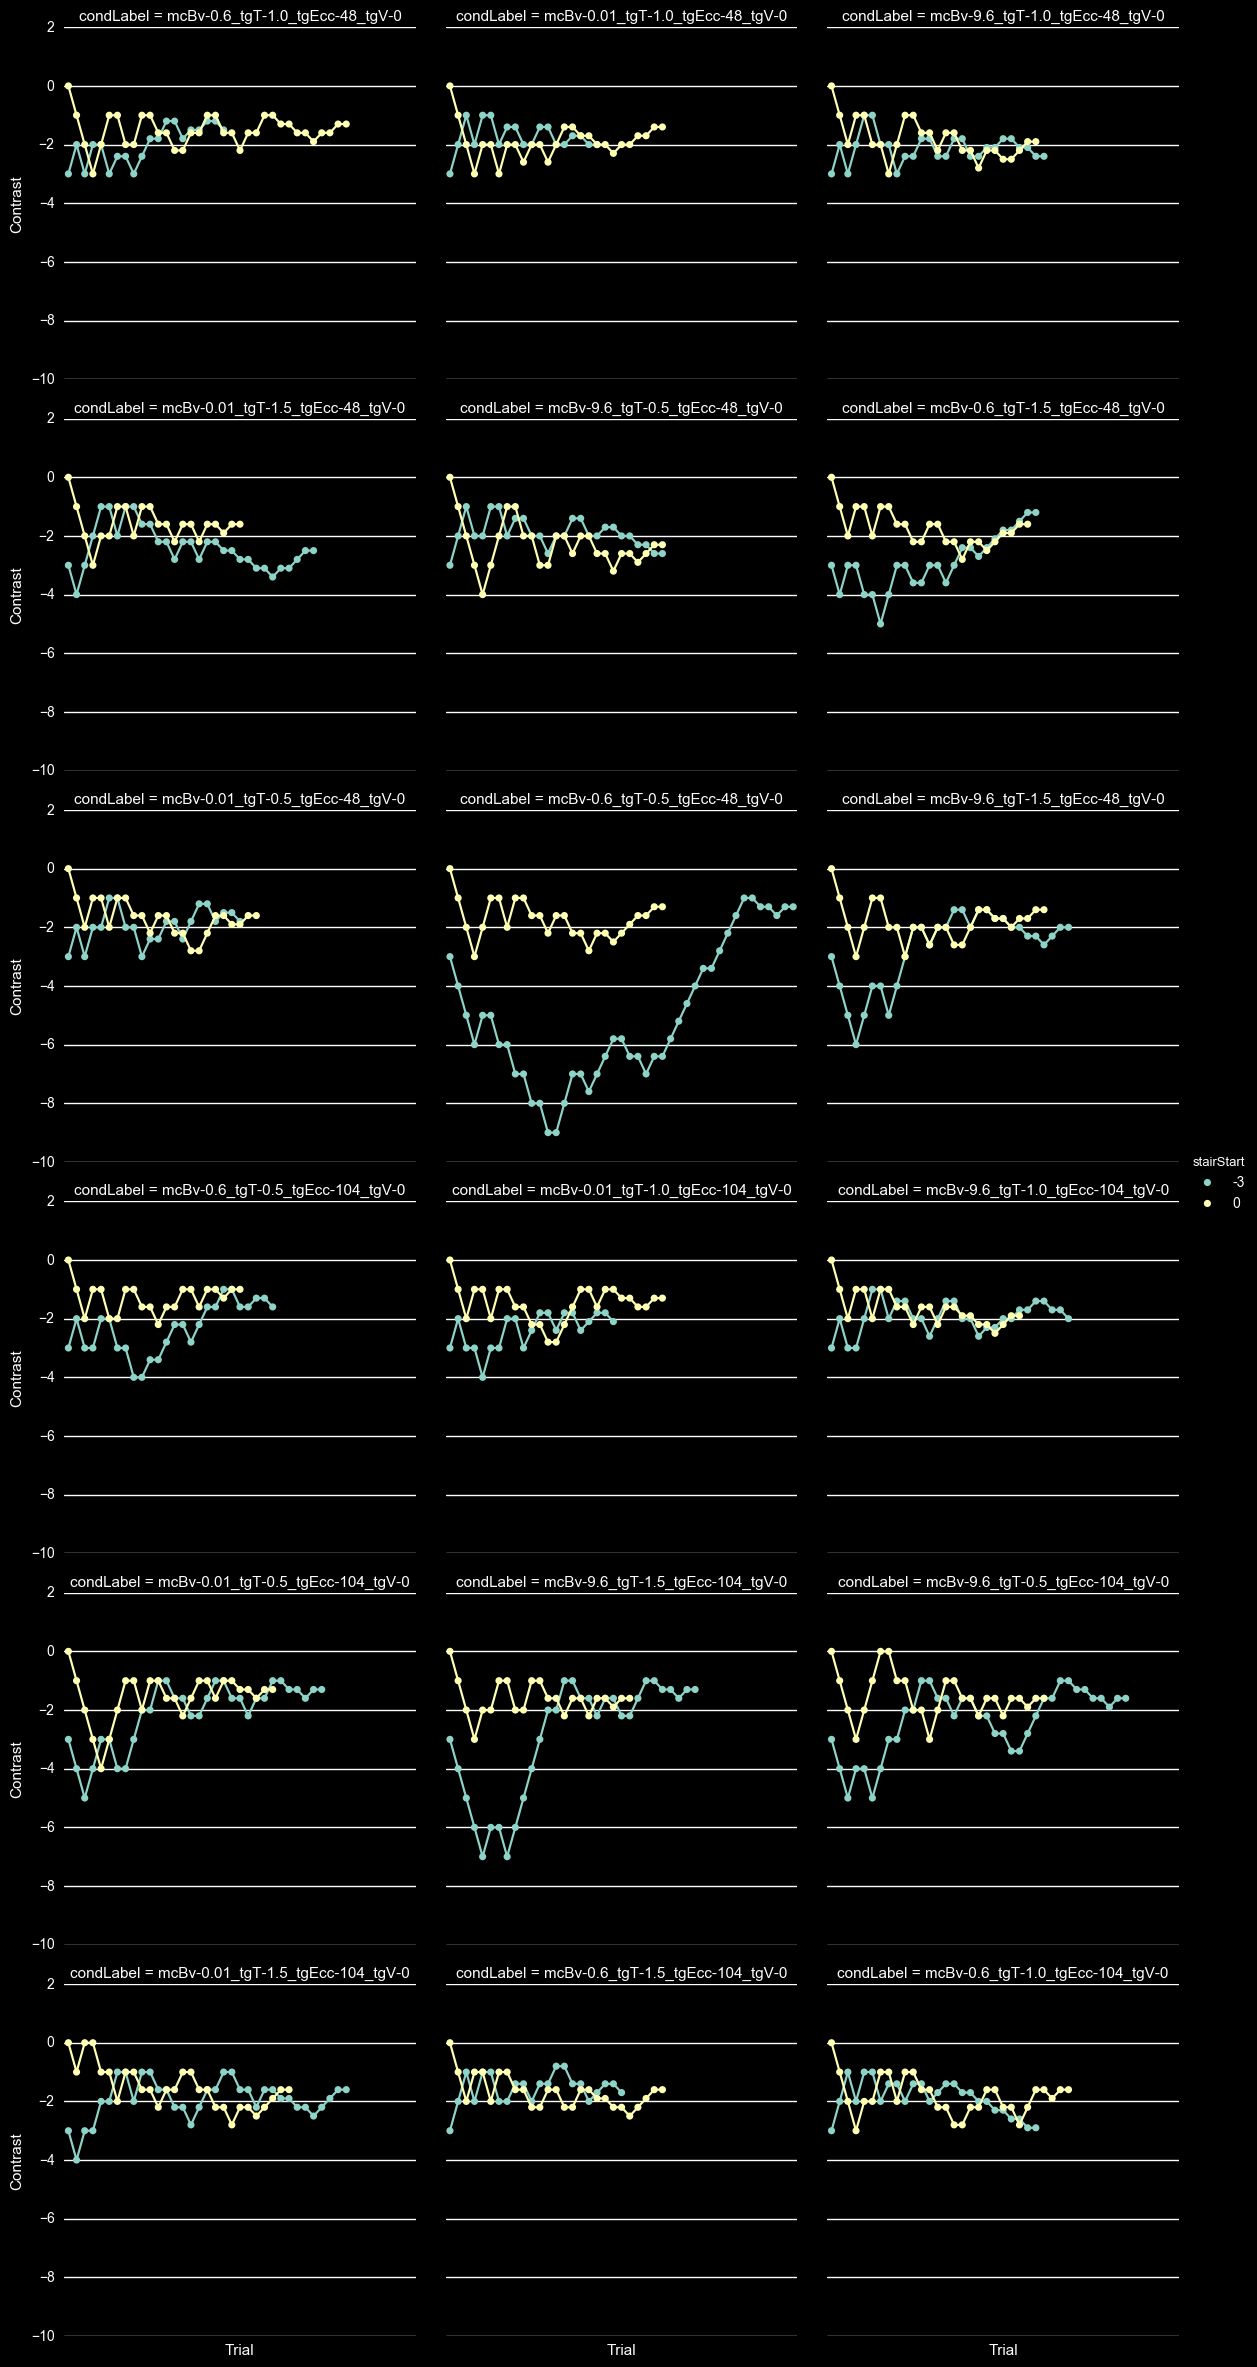

In [139]:
g = sns.factorplot(x='trialN', y='intns', hue='stairStart', col='condLabel', data=trials, 
               col_wrap=3, ci=None, scale=.5)
g.set_axis_labels('Trial','Contrast')
g.set(xticks=[])
#plt.ylim(-0.1,1.1)

In [140]:
print np.shape(revMeans)
meanRevsDF = pd.DataFrame({
    'meanRevs4': np.array(revMeans)[:,0],
    'meanRevs6': np.array(revMeans)[:,1],
    'meanRevs8': np.array(revMeans)[:,2] })
orderedRevMeans = pd.concat([meanRevsDF, orderInfo], axis=1)
#orderedRevMeans.head(5)
stairsWithRevs = pd.merge(orderedRevMeans, stairs, on=['participant','mcBv','targTpeak',
                                                       'targXoff2', 'targV', 'stairStart'])
stairsWithRevs.head(5)

(36, 3)


,meanRevs4,meanRevs6,meanRevs8,mcBv,participant,stairStart,targTpeak,targV,targXoff2,expName,...,targOri1,targOri2,targXoff1,targYoff,targTtot,trialT,fixCross,stairLabel,stairMean,condLabel
0,-1.425,-1.85,-2.0125,0.60,0,-3,1.0,0,48,mc2_tgT-mcBv_cent,...,0,0,-48,0,1,2,1,st-3_mcBv0.6_targTpeak1.0,NaN,mcBv-0.6_tgT-1.0_tgEcc-48_tgV-0
1,-1.775,-1.75,-1.6875,0.01,0,-3,1.0,0,48,mc2_tgT-mcBv_cent,...,0,0,-48,0,1,2,1,st-3_mcBv0.01_targTpeak1.0,NaN,mcBv-0.01_tgT-1.0_tgEcc-48_tgV-0
2,-2.350,-2.20,-2.1500,9.60,0,0,1.0,0,48,mc2_tgT-mcBv_cent,...,0,0,-48,0,1,2,1,st0_mcBv9.6_targTpeak1.0,NaN,mcBv-9.6_tgT-1.0_tgEcc-48_tgV-0
3,-1.825,-1.85,-1.7625,0.01,0,0,1.5,0,48,mc2_tgT-mcBv_cent,...,0,0,-48,0,1,2,1,st0_mcBv0.01_targTpeak1.5,NaN,mcBv-0.01_tgT-1.5_tgEcc-48_tgV-0
4,-1.925,-1.95,-1.8375,9.60,0,-3,0.5,0,48,mc2_tgT-mcBv_cent,...,0,0,-48,0,1,2,1,st-3_mcBv9.6_targTpeak0.5,NaN,mcBv-9.6_tgT-0.5_tgEcc-48_tgV-0


In [141]:
condRevMeans = stairsWithRevs.groupby('condLabel')['meanRevs4','meanRevs6','meanRevs8'].mean()
condRevMeans['condLabel'] = condRevMeans.index
condRevMeans = condRevMeans.reset_index(drop=True)
condRevMeans.head(6)

,meanRevs4,meanRevs6,meanRevs8,condLabel
0,-1.450,-1.50,-1.6250,mcBv-0.01_tgT-0.5_tgEcc-104_tgV-0
1,-1.775,-1.85,-1.8250,mcBv-0.01_tgT-0.5_tgEcc-48_tgV-0
2,-1.700,-1.80,-1.8500,mcBv-0.01_tgT-1.0_tgEcc-104_tgV-0
3,-1.850,-1.90,-1.9250,mcBv-0.01_tgT-1.0_tgEcc-48_tgV-0
4,-2.125,-2.00,-1.8750,mcBv-0.01_tgT-1.5_tgEcc-104_tgV-0
5,-2.275,-2.25,-2.0625,mcBv-0.01_tgT-1.5_tgEcc-48_tgV-0


In [142]:
stairsClean = stairs.drop(['stairStart','stairMean','stairLabel'],axis=1,inplace=False)
stairsClean.drop_duplicates(inplace=True)
conds = pd.merge(condRevMeans, stairsClean, how='inner', on='condLabel')
print conds.columns
conds.head(7)

Index([u'meanRevs4', u'meanRevs6', u'meanRevs8', u'condLabel', u'expName',
       u'time', u'participant', u'session', u'nRevs', u'mcSz', u'mcSf',
       u'mcBv', u'mcBsf', u'mcPeriGap', u'mcPeriFade', u'targSz', u'targSf',
       u'targOri1', u'targOri2', u'targXoff1', u'targXoff2', u'targYoff',
       u'targV', u'targTtot', u'targTpeak', u'trialT', u'fixCross'],
      dtype='object')


,meanRevs4,meanRevs6,meanRevs8,condLabel,expName,time,participant,session,nRevs,mcSz,...,targOri1,targOri2,targXoff1,targXoff2,targYoff,targV,targTtot,targTpeak,trialT,fixCross
0,-1.450,-1.50,-1.6250,mcBv-0.01_tgT-0.5_tgEcc-104_tgV-0,mc2_tgT-mcBv_peri,2017-01-26_1252,0,1,10,256,...,0,0,-104,104,0,0,1,0.5,2,1
1,-1.775,-1.85,-1.8250,mcBv-0.01_tgT-0.5_tgEcc-48_tgV-0,mc2_tgT-mcBv_cent,2017-01-26_1545,0,2,10,256,...,0,0,-48,48,0,0,1,0.5,2,1
2,-1.700,-1.80,-1.8500,mcBv-0.01_tgT-1.0_tgEcc-104_tgV-0,mc2_tgT-mcBv_peri,2017-01-26_1252,0,1,10,256,...,0,0,-104,104,0,0,1,1.0,2,1
3,-1.850,-1.90,-1.9250,mcBv-0.01_tgT-1.0_tgEcc-48_tgV-0,mc2_tgT-mcBv_cent,2017-01-26_1545,0,2,10,256,...,0,0,-48,48,0,0,1,1.0,2,1
4,-2.125,-2.00,-1.8750,mcBv-0.01_tgT-1.5_tgEcc-104_tgV-0,mc2_tgT-mcBv_peri,2017-01-26_1252,0,1,10,256,...,0,0,-104,104,0,0,1,1.5,2,1
5,-2.275,-2.25,-2.0625,mcBv-0.01_tgT-1.5_tgEcc-48_tgV-0,mc2_tgT-mcBv_cent,2017-01-26_1545,0,2,10,256,...,0,0,-48,48,0,0,1,1.5,2,1
6,-1.300,-1.55,-1.7250,mcBv-0.6_tgT-0.5_tgEcc-104_tgV-0,mc2_tgT-mcBv_peri,2017-01-26_1252,0,1,10,256,...,0,0,-104,104,0,0,1,0.5,2,1


In [143]:
print conds.shape
subconds = conds[conds.targXoff2==48]
print subconds.shape

(18, 27)
(9, 27)


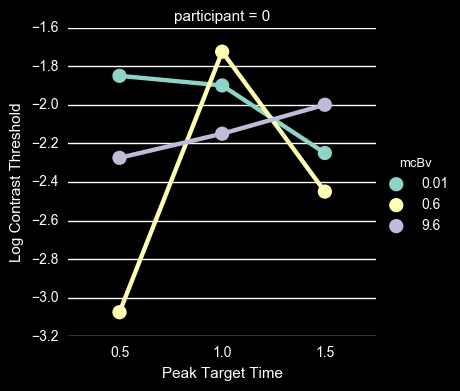

In [144]:
g = sns.factorplot(x='targTpeak', y='meanRevs6', hue='mcBv', col='participant', 
                   data=conds.ix[conds.targXoff2==48], ci=None)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')
#g.set(xticks=[])
#plt.ylim(-0.1,1.1)

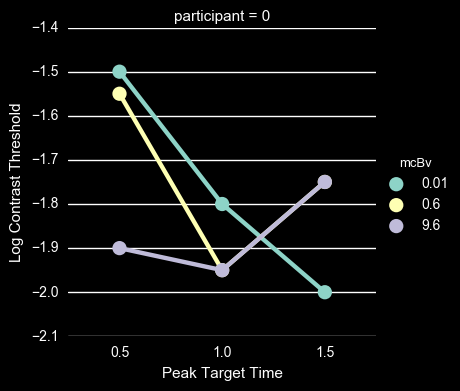

In [145]:
g = sns.factorplot(x='targTpeak', y='meanRevs6', hue='mcBv', col='participant', 
                   data=conds.ix[conds.targXoff2==104], ci=None)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')
#g.set(xticks=[])
#plt.ylim(-0.1,1.1)